<a href="https://colab.research.google.com/github/ahrarbinaslam/Machine-Learning-Based-Phishing-Email-Detection/blob/main/Machine_Learning_Based_Phishing_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Based Phishing Email Detection**

# Importing necessary libraries

In [2]:
!pip install contractions -q
!pip install textacy -q

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from textacy import preprocessing
import re
import contractions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Preprocessing Function

It is used to remove unwanted characters, symbols, punctuation, etc that are commonly present in textual data.

In [3]:
def preprocess( text):
  text = text.replace( '\n', '' )
  text = contractions.fix( text )
  text = preprocessing.normalize.unicode(text )
  text = preprocessing.replace.hashtags( text, "")
  text = re.sub( r'http\S+', '', text )
  text = re.sub( r'#+', '', text )
  text = preprocessing.remove.accents( text )
  text = preprocessing.remove.brackets( text )
  text = preprocessing.remove.html_tags( text )
  text = preprocessing.replace.currency_symbols( text, "")
  text = preprocessing.replace.emails( text, "")
  text = preprocessing.replace.emojis( text, "")
  text = preprocessing.replace.numbers( text, "")
  text = preprocessing.replace.phone_numbers( text, "")
  text = preprocessing.replace.urls( text, "")
  text = preprocessing.replace.user_handles( text, "")
  text = preprocessing.remove.punctuation( text )
  text = preprocessing.normalize.whitespace( text )
  text = text.lower()
  return text

# Tokenizing and Lemmatizing the text

In [4]:
from nltk.tokenize import word_tokenize
WordNet_lemmatizer = WordNetLemmatizer().lemmatize
def WordNetLemmatizer_tokenize(document):
    tokens = [WordNet_lemmatizer(w) for w in word_tokenize(document) if len(w) > 3 and w.isalpha()]
    return tokens

# Data Analysis

In [6]:
data=pd.read_csv("Phishing_Email.csv")
data

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [7]:
data.shape

(18650, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [9]:
data.keys()

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

# Visualing the number of safe vs phishing emails in the dataset

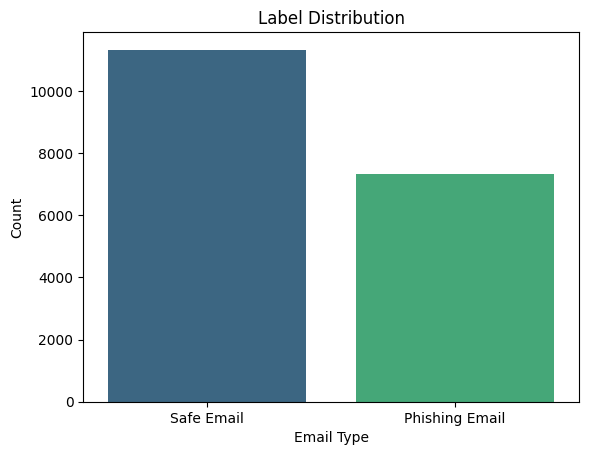

In [10]:
sns.countplot(x="Email Type", data=data, palette="viridis")
plt.title("Label Distribution")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

In [11]:
new_data=data.dropna()

In [12]:
new_data.isnull().sum()
new_data.shape

(18634, 3)

In [13]:
# Applying the processing function on our Email Text column
new_data["Cleaned Text"] = new_data["Email Text"].apply( lambda x: preprocess(x))
new_data.head(3)

,Unnamed: 0,Email Text,Email Type,Cleaned Text
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,re disc uniformitarianism re sex lang dick hud...
1,1,the other side of * galicismos * * galicismo *...,Safe Email,the other side of galicismos galicismo is a sp...
2,2,re : equistar deal tickets are you still avail...,Safe Email,re equistar deal tickets are you still availab...


In [14]:
# Converting the cleaned text into a text for TF-IDF Vectorizer
data_list=new_data["Cleaned Text"].to_list()
print(type(data_list))

<class 'list'>


In [15]:
# Converting the categorical labels into numberical using Label Encoder
label=LabelEncoder()
new_data["Email Type"]=label.fit_transform(new_data["Email Type"])
new_data["Email Type"]

,Email Type
0,1
1,1
2,1
3,0
4,0
...,...
18645,0
18646,1
18647,1
18648,1


In [16]:
new_data.head(3)

,Unnamed: 0,Email Text,Email Type,Cleaned Text
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,re disc uniformitarianism re sex lang dick hud...
1,1,the other side of * galicismos * * galicismo *...,1,the other side of galicismos galicismo is a sp...
2,2,re : equistar deal tickets are you still avail...,1,re equistar deal tickets are you still availab...


## Using Term Frequency-Inverse Document Frequency (TF-IDF) to convert textual data into numerical features.

In [17]:
vectorizer=TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(data_list)
y=new_data["Email Type"]

In [18]:
# Splitting the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape, y_train.shape

((14907, 157102), (14907,))

# **Naive Bayes Algorithm**

In [20]:
NaiveBayes = MultinomialNB()
NaiveBayes.fit(X_train,y_train)

MultinomialNB()

In [21]:
y_predicted_NB=NaiveBayes.predict(X_test)

In [22]:
y_test.shape

(3727,)

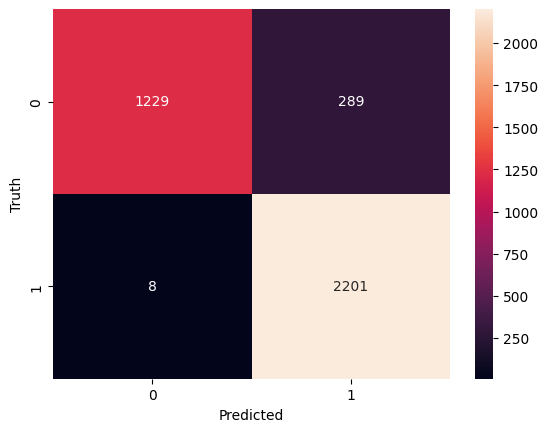

In [23]:
# Creating a confusion matrix
cm=confusion_matrix(y_test, y_predicted_NB)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

## Evaluating the Naive Bayes Model

We are going to evalute all the model based on their accuracy, precision, recall, and F1 score.

In [24]:
print(f"Naive Bayes Accuracy: {accuracy_score(y_test,y_predicted_NB)*100:.2f} %")
print(f"F1 Score from Naive Bayes: {f1_score(y_test,y_predicted_NB)*100:.2f} %")
print(f"Precision Score from Naive Bayes: {precision_score(y_test, y_predicted_NB)*100:.2f} %")
print(f"Recall Score from Naive Bayes: {recall_score(y_test, y_predicted_NB)*100:.2f} %")
print("\n")
# The classification report calculates all of the necessary classification parameters by itself
print("Classification report", classification_report(y_test,y_predicted_NB))

Naive Bayes Accuracy: 92.03 %
F1 Score from Naive Bayes: 93.68 %
Precision Score from Naive Bayes: 88.39 %
Recall Score from Naive Bayes: 99.64 %


Classification report               precision    recall  f1-score   support

           0       0.99      0.81      0.89      1518
           1       0.88      1.00      0.94      2209

    accuracy                           0.92      3727
   macro avg       0.94      0.90      0.91      3727
weighted avg       0.93      0.92      0.92      3727



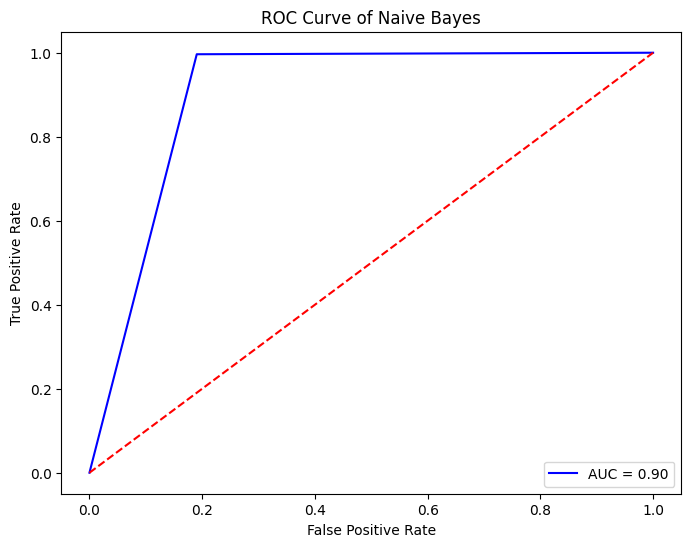

In [56]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_NB)

# Calculate AUC
auc = roc_auc_score(y_test, y_predicted_NB) # The greater the value of AUC to 1, the better the model is predicting

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve of Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# **Logistic Regression**

In [25]:
logisticregression = LogisticRegression()
logisticregression.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_predicted_logistic=logisticregression.predict(X_test)

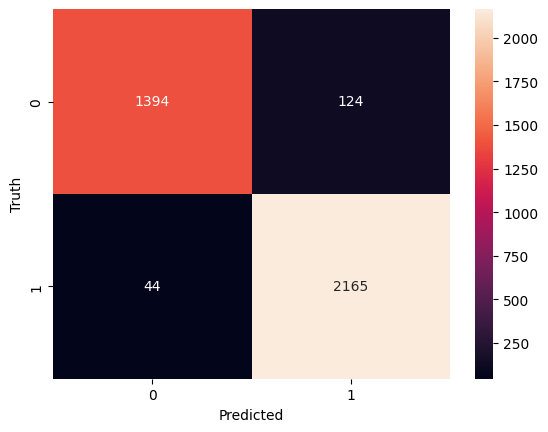

In [27]:
# Creating a confusion matrix
cm=confusion_matrix(y_test, y_predicted_logistic)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

## Evaluating the Logistic Regression Model

In [28]:
print(f"Logisitic Regression Accuracy: {accuracy_score(y_test,y_predicted_logistic)*100:.2f} %")
print(f"F1 Score from Logisitic Regression: {f1_score(y_test,y_predicted_logistic)*100:.2f} %")
print(f"Precision Score from Logisitic Regression: {precision_score(y_test, y_predicted_logistic)*100:.2f} %")
print(f"Recall Score from Logisitic Regression: {recall_score(y_test, y_predicted_logistic)*100:.2f} %")
print("\n")
print("Classification report", classification_report(y_test,y_predicted_logistic))

Logisitic Regression Accuracy: 95.49 %
F1 Score from Logisitic Regression: 96.27 %
Precision Score from Logisitic Regression: 94.58 %
Recall Score from Logisitic Regression: 98.01 %


Classification report               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1518
           1       0.95      0.98      0.96      2209

    accuracy                           0.95      3727
   macro avg       0.96      0.95      0.95      3727
weighted avg       0.96      0.95      0.95      3727



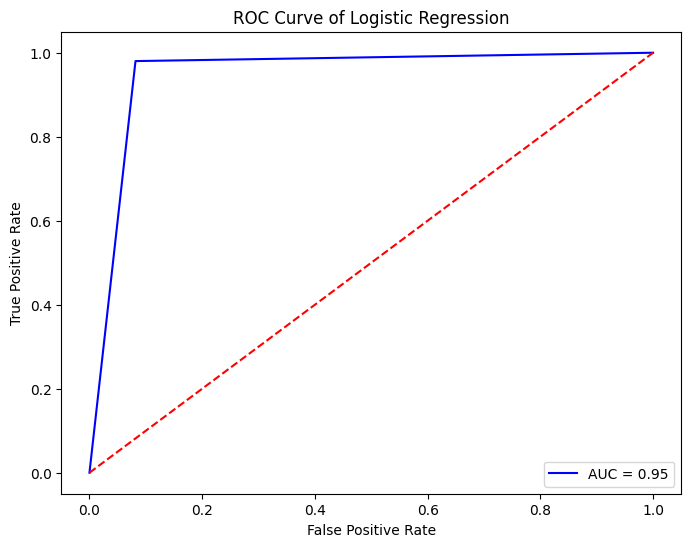

In [55]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_logistic)

# Calculate AUC
auc = roc_auc_score(y_test, y_predicted_logistic)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve of Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# **Decision Tree Classifier**

In [29]:
Decision_Tree=tree.DecisionTreeClassifier()
Decision_Tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_predicted_decision_tree=Decision_Tree.predict(X_test)

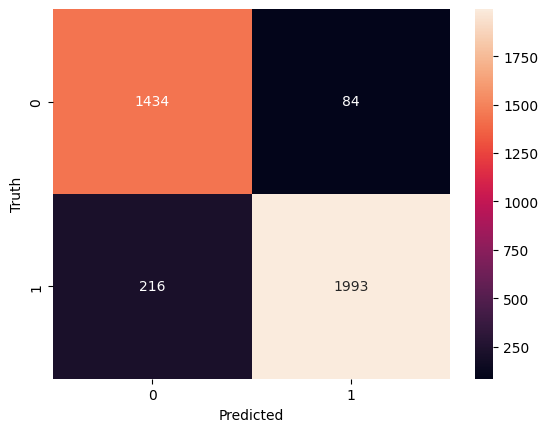

In [31]:
# Creating a confusion matrix
cm=confusion_matrix(y_test, y_predicted_decision_tree)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

## Evaluating the Decision Tree Model

In [32]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test,y_predicted_decision_tree)*100:.2f} %")
print(f"F1 Score from Decision Tree: {f1_score(y_test,y_predicted_decision_tree)*100:.2f} %")
print(f"Precision Score from Decision Tree: {precision_score(y_test, y_predicted_decision_tree)*100:.2f} %")
print(f"Recall Score from Decision Tree: {recall_score(y_test, y_predicted_decision_tree)*100:.2f} %")
print("\n")
print("Classification report", classification_report(y_test,y_predicted_decision_tree))

Decision Tree Accuracy: 91.95 %
F1 Score from Decision Tree: 93.00 %
Precision Score from Decision Tree: 95.96 %
Recall Score from Decision Tree: 90.22 %


Classification report               precision    recall  f1-score   support

           0       0.87      0.94      0.91      1518
           1       0.96      0.90      0.93      2209

    accuracy                           0.92      3727
   macro avg       0.91      0.92      0.92      3727
weighted avg       0.92      0.92      0.92      3727



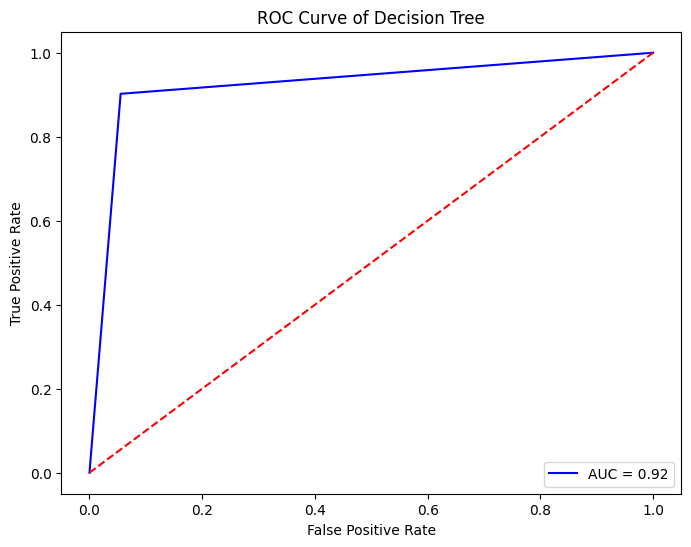

In [54]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_decision_tree)

# Calculate AUC
auc = roc_auc_score(y_test, y_predicted_decision_tree)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve of Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# **Random Forest**

In [33]:
Random_Forest=RandomForestClassifier(n_estimators=50)
Random_Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [34]:
y_predicted_random_forest=Random_Forest.predict(X_test)

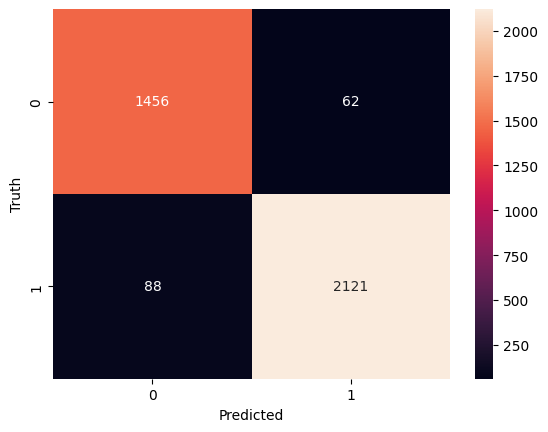

In [35]:
# Creating a confusion matrix
cm=confusion_matrix(y_test, y_predicted_random_forest)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

## Evaluating the Random Forest Model

In [36]:
print(f"Random Forest Accuracy: {accuracy_score(y_test,y_predicted_random_forest)*100:.2f} %")
print(f"F1 Score from Random Forest: {f1_score(y_test,y_predicted_random_forest)*100:.2f} %")
print(f"Precision Score from Random Forest: {precision_score(y_test, y_predicted_random_forest)*100:.2f} %")
print(f"Recall Score from Random Forest: {recall_score(y_test, y_predicted_random_forest)*100:.2f} %")
print("\n")
print("Classification report", classification_report(y_test,y_predicted_random_forest))

Random Forest Accuracy: 95.98 %
F1 Score from Random Forest: 96.58 %
Precision Score from Random Forest: 97.16 %
Recall Score from Random Forest: 96.02 %


Classification report               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1518
           1       0.97      0.96      0.97      2209

    accuracy                           0.96      3727
   macro avg       0.96      0.96      0.96      3727
weighted avg       0.96      0.96      0.96      3727



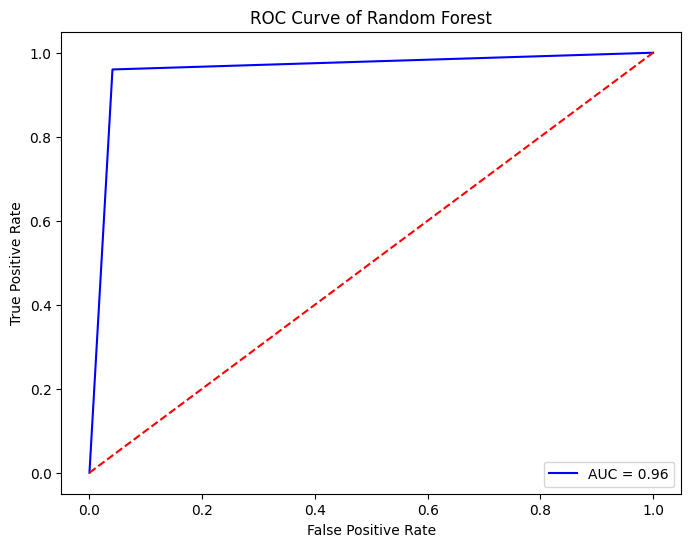

In [53]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_random_forest)

# Calculate AUC
auc = roc_auc_score(y_test, y_predicted_random_forest)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve of Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# **Support Vector Machine**

In [37]:
Support_Vector_Machine=SVC()
Support_Vector_Machine.fit(X_train,y_train)

SVC()

In [38]:
y_predicted_support_vector_machine=Support_Vector_Machine.predict(X_test)

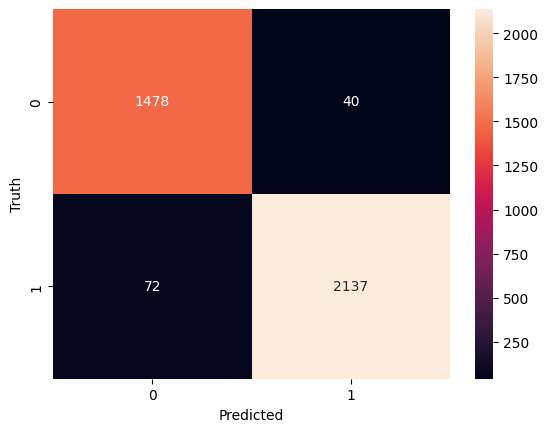

In [39]:
# Creating a confusion matrix
cm=confusion_matrix(y_test, y_predicted_support_vector_machine)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

## Evaluating the Support Vector Machine Model

In [40]:
print(f"Random Forest Accuracy: {accuracy_score(y_test,y_predicted_support_vector_machine)*100:.2f} %")
print(f"F1 Score from Random Forest: {f1_score(y_test,y_predicted_support_vector_machine)*100:.2f} %")
print(f"Precision Score from Random Forest: {precision_score(y_test, y_predicted_support_vector_machine)*100:.2f} %")
print(f"Recall Score from Random Forest: {recall_score(y_test, y_predicted_support_vector_machine)*100:.2f} %")
print("\n")
print("Classification report", classification_report(y_test,y_predicted_support_vector_machine))

Random Forest Accuracy: 96.99 %
F1 Score from Random Forest: 97.45 %
Precision Score from Random Forest: 98.16 %
Recall Score from Random Forest: 96.74 %


Classification report               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1518
           1       0.98      0.97      0.97      2209

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727



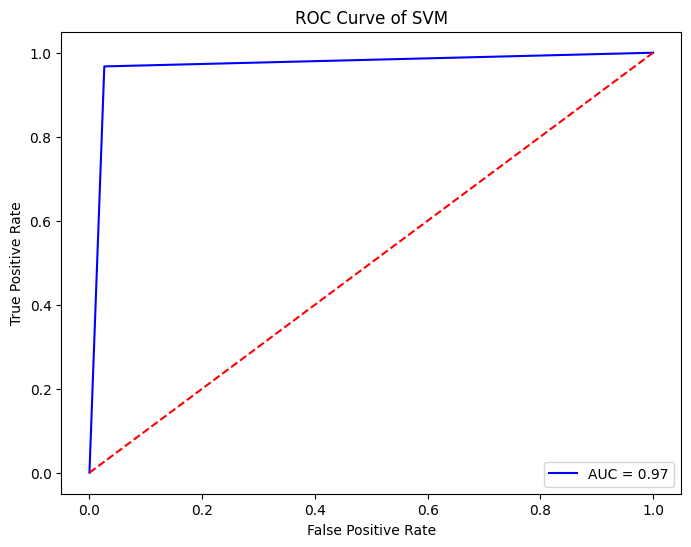

In [52]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_support_vector_machine)

# Calculate AUC
auc = roc_auc_score(y_test, y_predicted_support_vector_machine)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve of SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# **Comparing accuracies of multiple methods**



In [41]:
naive_bayes_accuracy=accuracy_score(y_test, y_predicted_NB)*100
logistic_regression_accuracy=accuracy_score(y_test,y_predicted_logistic)*100
decision_tree_accuracy=accuracy_score(y_test,y_predicted_decision_tree)*100
random_forest_accuracy=accuracy_score(y_test,y_predicted_random_forest)*100
support_vector_accuracy=accuracy_score(y_test,y_predicted_support_vector_machine)*100

Text(0, 0.5, 'Accuracy (%)')

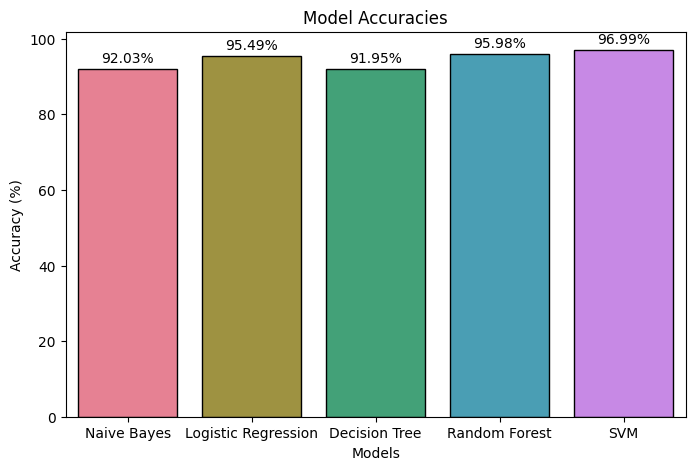

In [43]:
models=["Naive Bayes", "Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
accuracies=[naive_bayes_accuracy, logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy,support_vector_accuracy]

bar_dataframe = pd.DataFrame({"Model": models, "Accuracy": accuracies})
plt.figure(figsize=(8, 5))
barplot=sns.barplot(x="Model", y="Accuracy", data=bar_dataframe, palette="husl", edgecolor="black")
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, f"{bar.get_height():.2f}%",
             ha='center', va='bottom', fontsize=10, color='black')
plt.title("Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")